In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from platonicsolidsquadrature import * 
import seaborn as sns 

In [2]:
n = 10
platonicsolid = "ico"

pts,weights,neighbours,ptsdual,vertices,faces = platonicsolidsquadrature(platonicsolid, n, slerpflag=True)
print("Difference between qweights and 4pi: {}".format(sum(weights)-np.pi*4))

Difference between qweights and 4pi: 2.3096191625882057e-11


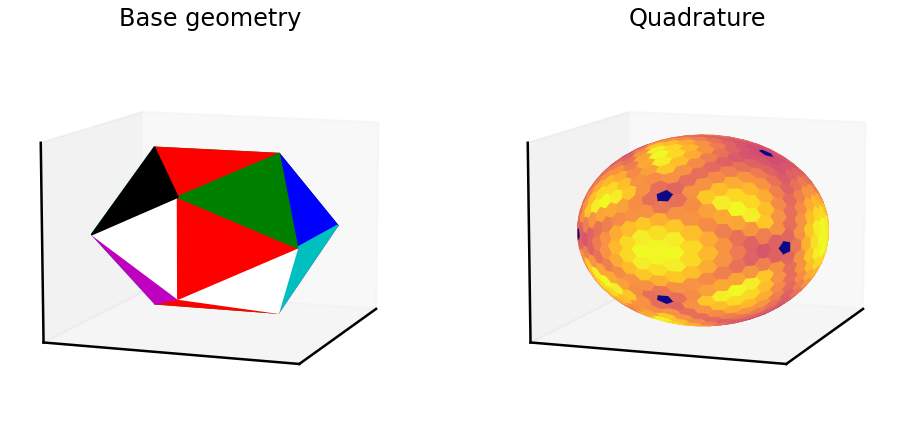

In [3]:
sns.set_context("poster")
fig = plt.figure(figsize=plt.figaspect(0.5)*2)

## Plot 1 
ax = fig.add_subplot(1, 2, 2, projection='3d')
cmap = matplotlib.cm.get_cmap('plasma')
norm = matplotlib.colors.Normalize(vmin = min(weights),vmax = max(weights))

nneighbours = [int(sum(neighbours[i,:]>=0)) for i in range(neighbours.shape[0])] 
for i in range(neighbours.shape[0]):
    x = [ptsdual[i,k,0] for k in range(nneighbours[i])]
    y = [ptsdual[i,k,1] for k in range(nneighbours[i])]
    z = [ptsdual[i,k,2] for k in range(nneighbours[i])]
    verts = [list(zip(x,y,z))]
    ax.add_collection3d(Poly3DCollection(verts,color = cmap(norm(weights[i]))))
    
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.view_init(10, 20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_title("Quadrature")

## Plot 2
ax = fig.add_subplot(1, 2, 1, projection='3d')
colors = ["r","g","b","k","c","m","w","orange",]
for i in range(faces.shape[0]):
    x = [vertices[faces[i,k],0] for k in range(3)]
    y = [vertices[faces[i,k],1] for k in range(3)]
    z = [vertices[faces[i,k],2] for k in range(3)]
    
    verts = [list(zip(x,y,z))]
    ax.add_collection3d(Poly3DCollection(verts,color = colors[i%7]))
    
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.view_init(10, 20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([]);
ax.set_title("Base geometry")
plt.savefig("image1.png")